# Regression with AdaBoost on Titanic Data

### 1. Predicting Age

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')

df = df[df['Age'].notna()]

# Assign input variables
X = df.loc[:,['Pclass','Sex','Fare','Embarked','SibSp','Parch','Survived']]

# Assign target variable
y = df['Age']

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)
X['Survived'] = X['Survived'].astype(object)
# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import AdaBoostRegressor
r1 = AdaBoostRegressor()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))

Rsquared on Testing:  0.22673864315434222


### Variable Importance

<AxesSubplot:ylabel='Variables'>

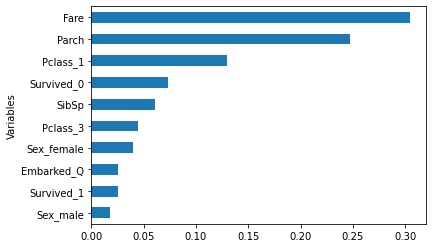

In [2]:
sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

Text(0.5, 1.1, 'Learning fast vs. slow')

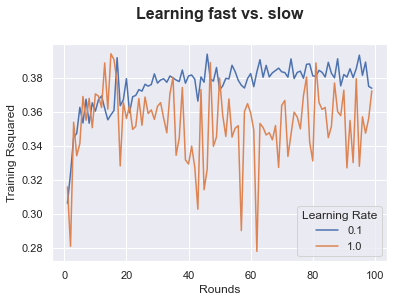

In [3]:
# Plot the Training Accuracy of adaboosts with n_estimators running from n1 to n2 and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1


ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Training Rsquared']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = AdaBoostRegressor(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_train,y_train) ]], 
                                    columns=list(['Rounds','Learning Rate','Training Rsquared'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Rsquared", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. slow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Learning fast vs. slow')

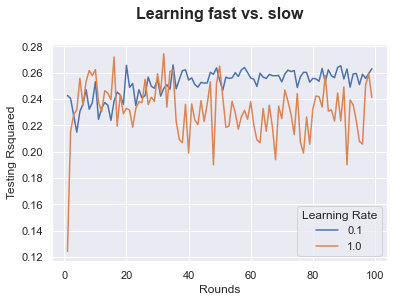

In [4]:
# Plot the Training Accuracy of adaboosts with n_estimators running from n1 to n2 and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Testing Rsquared']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = AdaBoostRegressor(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_test,y_test) ]], 
                                    columns=list(['Rounds','Learning Rate','Testing Rsquared'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Testing Rsquared", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. slow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

### 2. Practice

Find a dataset with a continuous target variable.

1. Set the input (X) and output (y). Split the data into 60% training and 40% testing

2. Train an adaboost with 200 n_estimators and .1 learning rare. What is testing Rsquared of the adaboost?

3. What is the most important variable according to the above adatboost model?

4. Find an adaboost that have a higher testing accuracy than the above adaboost. What is the n_estimators and learning of this adaboost? 

5. Plot the Training Rsquared of adaboosts with n_estimators running from 50 to 100 and two different learning rates. Give your comments on the plot. 

6. Plot the Testing Rsquared with different with n_estimators running from 50 to 100 and two different learning rates. Give your comments on the plot. 
